In [1]:
import h5py
import numpy as np
import glob, os, re, sys
import pickle

import astro_helper as ah

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
plt.style.use('bmh')
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

In [2]:
with open('./clouds_500.pickle', 'rb') as f:
    cloud_dict_of_lists = pickle.load(f)

In [3]:
print(cloud_dict_of_lists.keys())

dict_keys(['particles', 'mask', 'centroid', 'vcentroid', 'mass', 'veldispz', 'veldisp3D', 'divergence', 'angmomz', 'angmomR', 'temp', 'starformrate'])


In [4]:
centroids = np.vstack(cloud_dict_of_lists['centroid'])

In [5]:
rsln_px = 2000 # resolution of masks
width = 12. # diameter of galaxy in kpc

# check spatial distribution of cloud centroids and masks

In [6]:
all_masks = np.zeros((rsln_px, rsln_px))
for mask in cloud_dict_of_lists['mask']:
    all_masks[mask] = 1

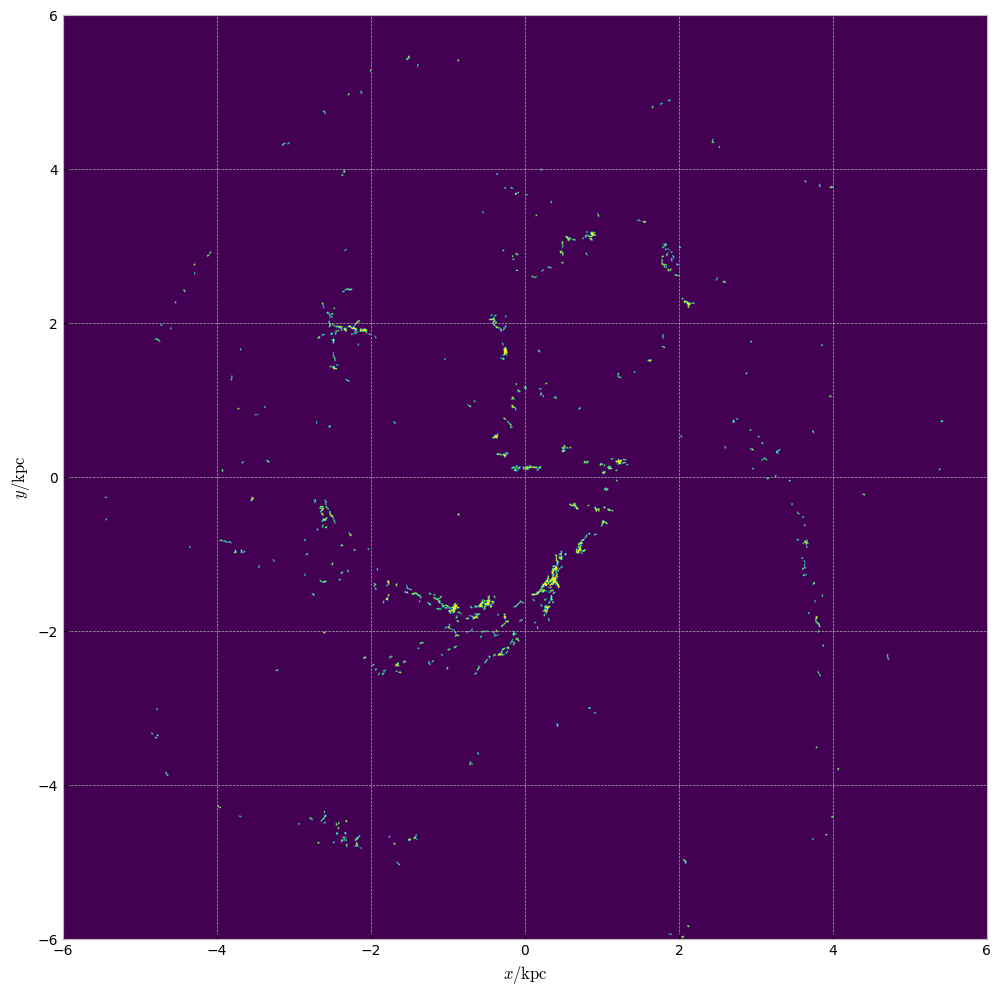

In [8]:
fig = plt.figure(figsize=(12,12))
plt.imshow(all_masks, extent=[-width/2., width/2., -width/2., width/2.])
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()

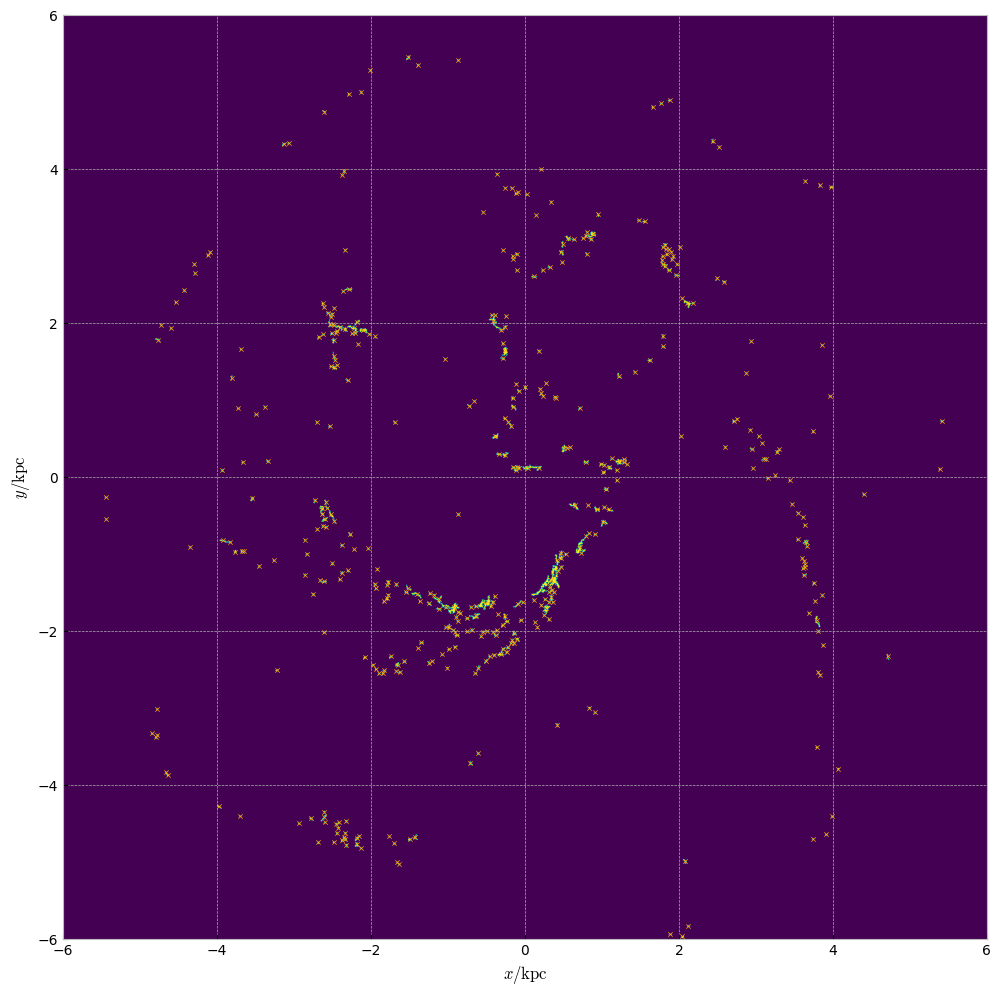

In [9]:
fig = plt.figure(figsize=(12,12))
plt.imshow(all_masks, extent=[-width/2., width/2., -width/2., width/2.])
plt.scatter(centroids[:,0]/ah.kpc_to_cm, centroids[:,1]/ah.kpc_to_cm, marker='x', color='orange', s=10, lw=0.5)
plt.xlabel(r'$x/{\rm kpc}$')
plt.ylabel(r'$y/{\rm kpc}$')
plt.show()

# check properties of clouds that have well-known observable ranges

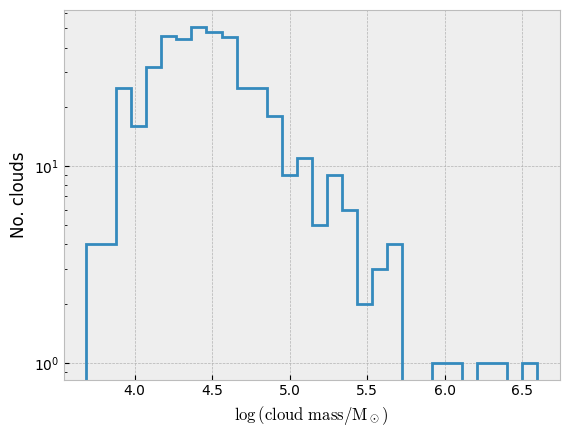

In [11]:
# masses should be between 1E4 and 1E8 solar masses, with a peak around 1E4 or 1E5
plt.hist(np.log10(np.array(cloud_dict_of_lists['mass'])/ah.Msol_to_g), bins=30, histtype='step', log=True, lw=2)
plt.xlabel(r'$\log{({\rm cloud~mass}/{\rm M}_\odot)}$')
plt.ylabel('No. clouds')
plt.show()

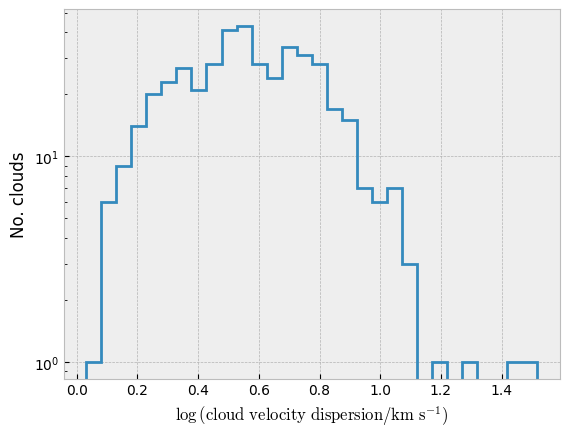

In [12]:
# velocity dispersions should vary from around 1 to 15 km/s
plt.hist(np.log10(np.array(cloud_dict_of_lists['veldispz'])/ah.kms_to_cms), bins=30, lw=2, histtype='step', log=True)
plt.xlabel(r'$\log{({\rm cloud~velocity~dispersion}/{\rm km~s}^{-1})}$')
plt.ylabel('No. clouds')
plt.show()

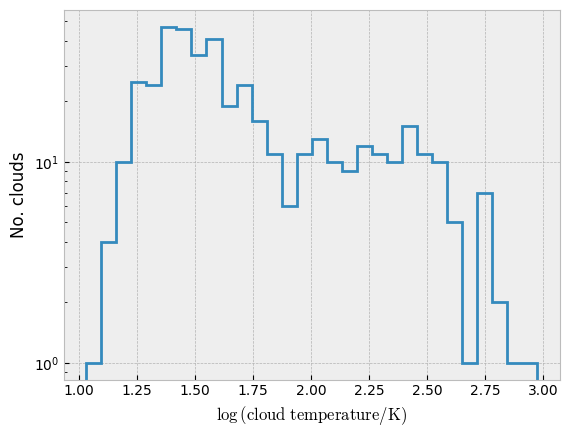

In [14]:
# temperatures should be cold (below 1000K)
plt.hist(np.log10(np.array(cloud_dict_of_lists['temp'])), bins=30, lw=2, histtype='step', log=True)
plt.xlabel(r'$\log{({\rm cloud~temperature}/{\rm K})}$')
plt.ylabel('No. clouds')
plt.show()